![](images/Vaccination_start.jpeg)

# **COVID-19 Vaccination Progress - Exploratory Data Analysis**

## INTRODUCTION

***

### COVID-19 pandemic

The coronavirus disease (COVID-19) is an infectious disease which is caused by a new coronavirus and was first detected in Q4 2019. As the disease spread around the world it was declared a pandemic early in 2020. Now, a year later (March 2021), the effects of the global pandemic continue to affect and change the lives of each and everyone across the world. Whereas most people who contract the disease will experience mild to moderate respiratory illness and recover without requiring special treatment, especially the elderly, and those with underlying medical problems are more likely to develop very serious conditions. The way forward in fighting the disease is to vaccinate the world population. In our EDA we will investigate the progress of this process from December 2020 to March 2021.
A complete overview of the COVID-19 pandemic by the [WHO](https://www.who.int/health-topics/coronavirus#tab=tab_1).

***

The following four notebooks based upon each other:

1) 24042021_Cleaning_Birte.ipynb 

2) 25042021_EDA_Visualization_Birte.ipynb 

3) 25042021_Timeseries_fbprophet_Birte.ipynb

4) 24042021_Modelling_Birte.ipynb 


***
### Dataset overview

The dataset used in this capstone project is COVID-19 World Vaccination Progress (version 81) created by Gabriel Preda and [available on Kaggle](https://www.kaggle.com/gpreda/covid-world-vaccination-progress). It is a compilation of COVID-19 vaccination data provided by [OurWordinData](https://ourworldindata.org/covid-vaccinations). The 'OurWorldinData' website contains many information regarding the global vaccination progress, including visualisations of the progress as well as an overview of approved vaccines worldwide. 

In this notebook we used the dataset after cleaning. The cleaning steps can be find in the following notebook: 24042021_Cleaning_Birte.ipynb

**The dataset contains 8079 observations for 15 features.**

| FEATURE | description | comment |
|----|----|----|
| **country** | 147 countries | 4 duplicates, UN recognises 197 countries (193 are members) |
| **iso_code** | country code by ISO norm | -|
| **date** | data entry (13th December 2020 to 24th March 2021) | - |
| **vaccines** | name/company | - |
| **daily_vaccinations** | no. of vaccination for that date/country | some days only daily vaccinations, some days only the (cummulative) total |
| **daily_vaccinations_raw** | daily vaccinations as CHANGE COMPARED TO PREVIOUS DAY (cross-check purposes) | calculation: total_vaccinations (day) - total_vaccination (previous day) |
| **daily_vaccinations_per_million** | ratio (in ppm) between vaccination number and total population for the current date in the country | - |
| **total_vaccinations** | absolute number of immunisations (jabs) in the country | some days only daily vaccinations, some days only the (cummulative) total |
| **total_vaccinations_per_hundred** | ratio (in percent) between vaccination number and total population up to the date in the country | - |
| **people_vaccinated** | total no. of people with immunisation (partial and full) | - |
| **people_vaccinated_per_hundred** | ratio (in percent) between population immunized (partial and full) and total population | - |
| **people_fully_vaccinated** | total no. of people with full immunisation (typically 2) | - |
| **people_fully_vaccinated_per_hundred** | ratio (in percent) between population fully immunized and total population | - |
| **source_name** | national authority, international organization, local organization etc. | - |
| **source_website** | website link to source | - |

***

### Key objectives

The focus of the EDA is to analyze the distribution of the vaccination progress by countries and regions to answer the following questions:

- Does a high number of infections lead to a faster vaccination progress?
- Which country is the fastest vaccinating its people?
- Which country vaccinated the most (absolute)?
- How is the vaccination progress by region?

***

![](images/images.jpeg)

## Import of libraries

In [1]:
#common imports:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import os

import matplotlib.dates as md

#import for visualization
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import pandas_bokeh
pandas_bokeh.output_notebook()
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show

#for Worldmap
import geopandas as gpd
#from shapely.geometry import Point
import geopy
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

#sns.set(rc={'figure.figsize':(14,12)})
import matplotlib.dates as mdates

#import plotly as py
#from plotly.subplots import make_subplots
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)

#suppress pandas future warnings:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Where to save the figures
#PROJECT_ROOT_DIR = "."
#CHAPTER_ID = "end_to_end_project"
#IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
#os.makedirs(IMAGES_PATH, exist_ok=True)

#def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
 #   path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
 #   print("Saving figure", fig_id)
  #  if tight_layout:
  #      plt.tight_layout()
 #   plt.savefig(path, format=fig_extension, dpi=resolution)

Loading BokehJS ...

In [2]:
#output_notebook()

## Loading datasets

We cleaned the original Kaggle dataset in the separate Notebook '24042021_Cleaning_Birte.ipynb'.

In [3]:
#Loading cleaned dataframe from Data_Cleaning Notebook:
df2 = pd.read_csv('df2.csv')
df3 = pd.read_csv('df3.csv')
df4 = pd.read_csv('df4.csv')
df5 = pd.read_csv('df5.csv')
df6 = pd.read_csv('df6.csv')

In [4]:
df2.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-23                 NaN                NaN   
1  Afghanistan      AFG  2021-02-24                 NaN                NaN   
2  Afghanistan      AFG  2021-02-25                 NaN                NaN   
3  Afghanistan      AFG  2021-02-26                 NaN                NaN   
4  Afghanistan      AFG  2021-02-27                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations  \
0                      0.0              1367.0   
1                      0.0              1367.0   
2                      0.0              1367.0   
3                      0.0              1367.0   
4                      0.0              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             NaN                            NaN   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  0.0                            35.0   
1                                  0.0                            35.0   
2                                  0.0                            35.0   
3                                  0.0                            35.0   
4                                  0.0                            35.0   

             vaccines  
0  Oxford/AstraZeneca  
1  Oxford/AstraZeneca  
2  Oxford/AstraZeneca  
3  Oxford/AstraZeneca  
4  Oxford/AstraZeneca

In [5]:
#Number of countries included in dataset:
df6 = df5.copy()
#df6 = df6.set_index(['date'])
ncountry = df6['country'].nunique()
print(F'{ncountry} countries are included in the Covid-19 vaccination progress dataset.')

144 countries are included in the Covid-19 vaccination progress dataset.


### Adding regions

The cleaned dataset included only countries so far. We also wanted to show the vaccination progress per region why we grouped the countries in the following regions:

In [6]:
#Create list with countries per region, create new column in df6 and map region to country:
Africa = ('Algeria','Angola','Chad','Congo', "Cote d'Ivoire",'Egypt','Equatorial Guinea','Ghana','Guinea','Kenya','Malawi','Maldives','Mali','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe', 'Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Western Sahara', 'Zambia','Zimbabwe')

Asia = ('Afghanistan','Azerbaijan','Bangladesh','Bhutan','Brunei','Cambodia','China','East Timor','Hong Kong','India','Indonesia','Japan','Kazakhstan','Kyrgyzstan','Laos','Macao','Malaysia','Maldives','Mongolia','Myanmar','Nepal','North Korea','Pakistan','Philippines','Russia','Singapore','South Korea','Sri Lanka','Taiwan','Tajikistan','Thailand','Turkmenistan','Uzbekistan','Vietnam')
    
Middle_East = ('Bahrain','Iran','Iraq','Israel','Jordan','Kuwait','Lebanon','Oman','Qatar','Saudi Arabia','Syria','Turkey','United Arab Emirates','Yemen')
   
Europe = ('Albania','Andorra','Armenia','Austria','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Faeroe Islands','Finland','France','Georgia','Germany','Greece','Greenland','Hungary','Iceland','Ireland','Italy','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','North Macedonia','Northern Cyprus','Norway','Poland','Portugal','Romania','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','Vatican City')

UK_BritishOversea= ('United Kingdom','Anguilla','Antigua and Barbuda','Bermuda','Cayman Islands','Falkland Islands','Gibraltar','Guernsey','Isle of Man','Jersey', 'Montserrat', 'Saint Helena', 'Turks and Caicos Islands')

North_America = ('Canada','United States')
Central_America_Caribic = ('Antigua and Barbuda','Bahamas','Barbados','Belize','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago')
South_America = ('Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela')
Australia_Oceania = ('Australia','Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu')


continents = {country: 'Asia' for country in Asia}
continents.update({country: 'Europe' for country in Europe})
continents.update({country: 'Africa' for country in Africa})
continents.update({country: 'Middle_East' for country in Middle_East})
continents.update({country: 'UK_BritishOversea' for country in UK_BritishOversea})
continents.update({country: 'North_America' for country in North_America})
continents.update({country: 'Central_America_Caribic' for country in Central_America_Caribic})
continents.update({country: 'South_America' for country in South_America})
continents.update({country: 'Australia_Oceania' for country in Australia_Oceania})

df6['cgrouped'] = df6['country'].map(continents)



We separated UK from Europe and grouped it together with the British oversea countries/territories. 

## Worldmap

For a fast overview we created worldmaps of

- Total corona cases per country at 23.03.2021

- People fully vaccinated per country at 23.03.2021

- Daily vaccinations


In [7]:
#Initialize visualization set:
#sns.set(style='whitegrid', palette='pastel', color_codes=True) 
sns.mpl.rc('figure', figsize=(14,12))

In [8]:
# map plot based on country map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#fix missing iso codes for France, Norway, Somaliland and Kosovo:
world.loc[world['name'] == 'France', 'iso_a3'] = 'FRA'
world.loc[world['name'] == 'Norway', 'iso_a3'] = 'NOR'
world.loc[world['name'] == 'Somaliland', 'iso_a3'] = 'SOM'
world.loc[world['name'] == 'Kosovo', 'iso_a3'] = 'RKS'
world.loc[world['name'] == 'Congo', 'iso_a3'] = 'COG'
world.loc[world['name'] == 'Egypt', 'iso_a3'] = 'EGY'
world.loc[world['name'] == 'Namibia', 'iso_a3'] = 'NAM'
world.loc[world['name'] == 'Libya', 'iso_a3'] = 'LBY'
world.loc[world['name'] == 'Mauretania', 'iso_a3'] = 'MRT'
world.loc[world['name'] == 'Mali', 'iso_a3'] = 'MLI'
world.loc[world['name'] == 'Botswana', 'iso_a3'] = 'BWA'
world.sample(5)

pop_est      continent         name iso_a3  gdp_md_est  \
54    11038805         Africa        Benin    BEN     24310.0   
136    4510327        Oceania  New Zealand    NZL    174800.0   
43    67106161         Europe       France    FRA   2699000.0   
160     265100           Asia    N. Cyprus    -99      3600.0   
27   124574795  North America       Mexico    MEX   2307000.0   

                                              geometry  
54   POLYGON ((2.69170 6.25882, 1.86524 6.14216, 1....  
136  MULTIPOLYGON (((176.88582 -40.06598, 176.50802...  
43   MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...  
160  POLYGON ((32.73178 35.14003, 32.80247 35.14550...  
27   POLYGON ((-117.12776 32.53534, -115.99135 32.6...

In [9]:
#import additional data with number of infections:
df_all_in = pd.read_csv('df_for_allin.csv')
df_all_in.tail()

country iso_code        date  total_cases  total_deaths_per_million  \
6686  Zimbabwe      ZWE  2021-03-19      36652.0                   101.595   
6687  Zimbabwe      ZWE  2021-03-20      36662.0                   101.595   
6688  Zimbabwe      ZWE  2021-03-21      36665.0                   101.730   
6689  Zimbabwe      ZWE  2021-03-22      36684.0                   101.864   
6690  Zimbabwe      ZWE  2021-03-23      36717.0                   101.999   

      total_cases_per_million  daily_vaccinations  \
6686                 2466.001               772.0   
6687                 2466.674               836.0   
6688                 2466.876               910.0   
6689                 2468.154               805.0   
6690                 2470.375               655.0   

      people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
6686                           0.28                                  0.0   
6687                           0.28                                  0.0   
6688                           0.29                                  0.0   
6689                           0.29                                  0.0   
6690                           0.30                                  0.0   

      population  population_density  gdp_per_capita  
6686  14862927.0              42.729        1899.775  
6687  14862927.0              42.729        1899.775  
6688  14862927.0              42.729        1899.775  
6689  14862927.0              42.729        1899.775  
6690  14862927.0              42.729        1899.775

In [10]:
#Select total cases for last day reported:
df_allin_last=df_all_in.sort_values(by="date").drop_duplicates(subset=["country"], keep="last")
df_allin_last= df_allin_last[['country','iso_code', 'total_cases','date','daily_vaccinations']]
df_allin_last['total_cases']= df_allin_last.total_cases.astype('int64')
df_allin_last['country'] = df_allin_last['country'].replace(['United States'],'United States of America')
df_allin_last['country'] = df_allin_last['country'].replace(['North Macedonia'],'Macedonia')
df_allin_last['country'] = df_allin_last['country'].replace(['Dominican Republic'],'Dominican Rep.')
df_allin_last['country'] = df_allin_last['country'].replace(['Equatorial Guinea'],'Eq. Guinea')
df_allin_last['country'] = df_allin_last['country'].replace(["Cote d'Ivoire"],"Côte d'Ivoire")

df_allin_last.sample(15)


country iso_code  total_cases        date  \
1968                     Egypt      EGY       165418  2021-01-30   
5649                 Singapore      SGP        60221  2021-03-23   
3996                   Moldova      MDA       217715  2021-03-23   
6603  United States of America      USA     29926950  2021-03-23   
2474                   Grenada      GRD          154  2021-03-15   
1962                   Ecuador      ECU       312598  2021-03-21   
5300               Saint Lucia      LCA         4113  2021-03-19   
837                     Belize      BLZ        12410  2021-03-23   
2001                Eq. Guinea      GNQ         6603  2021-03-16   
3760                  Malaysia      MYS       335540  2021-03-23   
2168                   Finland      FIN        72713  2021-03-23   
6178                    Taiwan      TWN         1007  2021-03-23   
3272                    Jordan      JOR       553727  2021-03-23   
6202                  Thailand      THA        28346  2021-03-23   
4669                    Panama      PAN       351667  2021-03-23   

      daily_vaccinations  
1968               219.0  
5649             39522.0  
3996               911.0  
6603           2497025.0  
2474               330.0  
1962              5528.0  
5300               408.0  
837                901.0  
2001                 NaN  
3760             19354.0  
2168             19000.0  
6178              1609.0  
3272             11614.0  
6202              4383.0  
4669              6638.0

In [11]:
df_allin_last=df_all_in.sort_values(by="date").drop_duplicates(subset=["country"], keep="last")
df_allin_last= df_allin_last[['country','iso_code', 'total_cases','date','daily_vaccinations']]
df_allin_last['total_cases']= df_allin_last.total_cases.astype('int64')
df_allin_last['country'] = df_allin_last['country'].replace(['United States'],'United States of America')
df_allin_last['country'] = df_allin_last['country'].replace(['North Macedonia'],'Macedonia')
df_allin_last['country'] = df_allin_last['country'].replace(['Dominican Republic'],'Dominican Rep.')
df_allin_last['country'] = df_allin_last['country'].replace(['Equatorial Guinea'],'Eq. Guinea')
df_allin_last['country'] = df_allin_last['country'].replace(["Cote d'Ivoire"],"Côte d'Ivoire")
mapped1 = pd.merge(left=world, right=df_allin_last, left_on='iso_a3', right_on='iso_code')
#mapped1 = world.set_index('iso_a3').join(df_allin_last.set_index('iso_code')).reset_index()
#mapped1 = world.set_index('iso_a3').join(df_allin_last.set_index('iso_code'), ).reset_index()
#mapped1.sample(15)
mapped1.sample(15)

pop_est      continent         name iso_a3  gdp_md_est  \
56   204924861           Asia     Pakistan    PAK    988200.0   
72    10768477         Europe       Greece    GRC    290500.0   
76     8236303         Europe  Switzerland    CHE    496300.0   
58    82021564           Asia         Iran    IRN   1459000.0   
13   207353391  South America       Brazil    BRA   3081000.0   
84    23232413        Oceania    Australia    AUS   1189000.0   
70    80594017         Europe      Germany    DEU   3979000.0   
98    10674723         Europe      Czechia    CZE    350900.0   
34      778358         Africa   Eq. Guinea    GNQ     31770.0   
82     5011102         Europe      Ireland    IRL    322000.0   
55    29384297           Asia        Nepal    NPL     71520.0   
91      339747         Europe      Iceland    ISL     16150.0   
77      594130         Europe   Luxembourg    LUX     58740.0   
53  1281935911           Asia        India    IND   8721000.0   
99   126451398           Asia        Japan    JPN   4932000.0   

                                             geometry      country iso_code  \
56  POLYGON ((77.83745 35.49401, 76.87172 34.65354...     Pakistan      PAK   
72  MULTIPOLYGON (((26.29000 35.29999, 26.16500 35...       Greece      GRC   
76  POLYGON ((9.59423 47.52506, 9.63293 47.34760, ...  Switzerland      CHE   
58  POLYGON ((48.56797 29.92678, 48.01457 30.45246...         Iran      IRN   
13  POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...       Brazil      BRA   
84  MULTIPOLYGON (((147.68926 -40.80826, 148.28907...    Australia      AUS   
70  POLYGON ((14.11969 53.75703, 14.35332 53.24817...      Germany      DEU   
98  POLYGON ((15.01700 51.10667, 15.49097 50.78473...      Czechia      CZE   
34  POLYGON ((9.64916 2.28387, 11.27645 2.26105, 1...   Eq. Guinea      GNQ   
82  POLYGON ((-6.19788 53.86757, -6.03299 53.15316...      Ireland      IRL   
55  POLYGON ((88.12044 27.87654, 88.04313 27.44582...        Nepal      NPL   
91  POLYGON ((-14.50870 66.45589, -14.73964 65.808...      Iceland      ISL   
77  POLYGON ((6.04307 50.12805, 6.24275 49.90223, ...   Luxembourg      LUX   
53  POLYGON ((97.32711 28.26158, 97.40256 27.88254...        India      IND   
99  MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...        Japan      JPN   

    total_cases        date  daily_vaccinations  
56       607453  2021-03-14             13196.0  
72       242347  2021-03-23             26705.0  
76       580609  2021-03-21             21212.0  
58      1786265  2021-03-19              3806.0  
13     12130019  2021-03-23            417182.0  
84        29221  2021-03-23             17870.0  
70      2699231  2021-03-23            217939.0  
98      1475538  2021-03-23             34517.0  
34         6603  2021-03-16                 NaN  
82       230599  2021-03-21              8995.0  
55       275750  2021-03-19             44361.0  
91         6122  2021-03-23               884.0  
77        59662  2021-03-23              1990.0  
53     11734058  2021-03-23           2253821.0  
99       458621  2021-03-23             48562.0

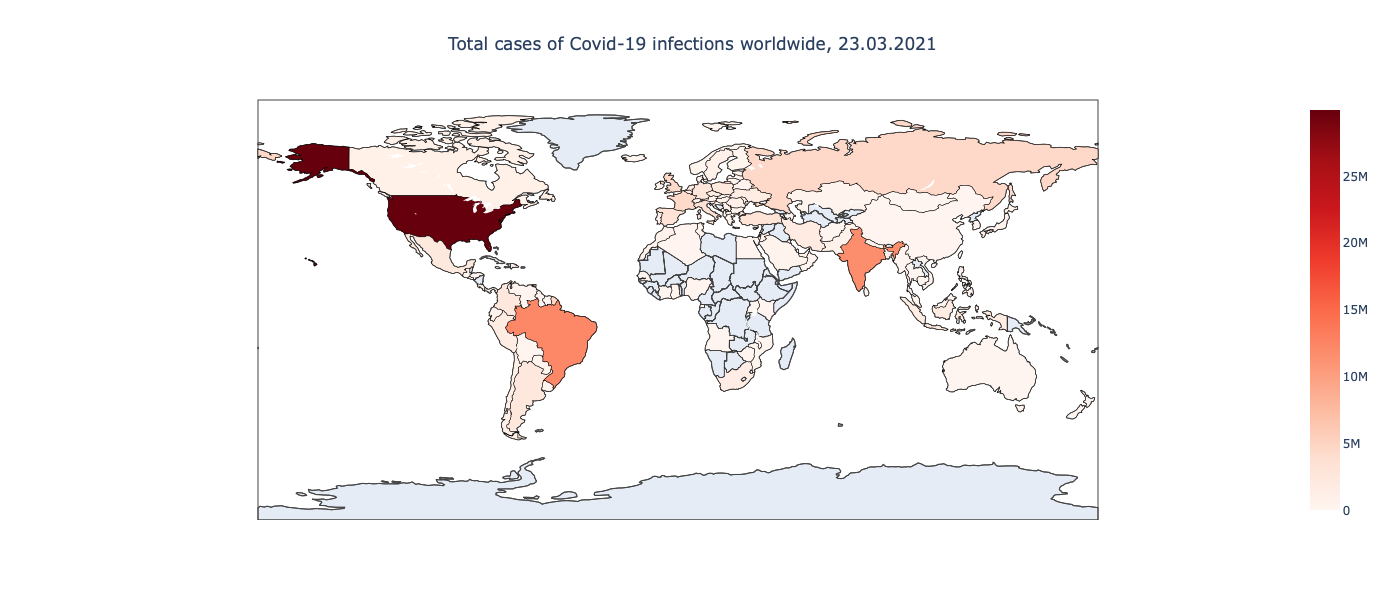

In [12]:
#mapped1 = mapped1.groupby(['country', 'date']).sort_values('date', ascending=False)
mapped1 = mapped1[mapped1['total_cases']>0.0]
# Create the Choropleth
fig = go.Figure(data=go.Choropleth(
    locations = mapped1['country'],
    locationmode = 'country names',#country names
    z = mapped1['total_cases'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))
fig.update_layout(
    title_text = 'Total cases of Covid-19 infections worldwide, 23.03.2021',
    title_x = 0.5,width= 800,
        height= 600,
    geo=dict(
        showframe = True,
        showcoastlines = True,
        projection_type = 'equirectangular',
        showcountries= True,
    )
)


The most cases we see for the United States, Brazil and India. The infections for China are very low with only around 100.000 cases. In Europe France and UK have the highest number with around 4 million cases followed by Spain and Italy.

In [13]:
#function to create map graph
def graph_world(feature):
    to_be_mapped = feature
    vmin, vmax = 0,100
    fig, ax = plt.subplots(1, figsize=(25,25))

    mapped1.plot(column=to_be_mapped, cmap='Blues', linewidth=0.8, ax=ax, edgecolors='0.8')
    ax.set_title('x', fontdict={'fontsize':30})
    ax.set_axis_off()

    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []

    cbar = fig.colorbar(sm, orientation='horizontal')

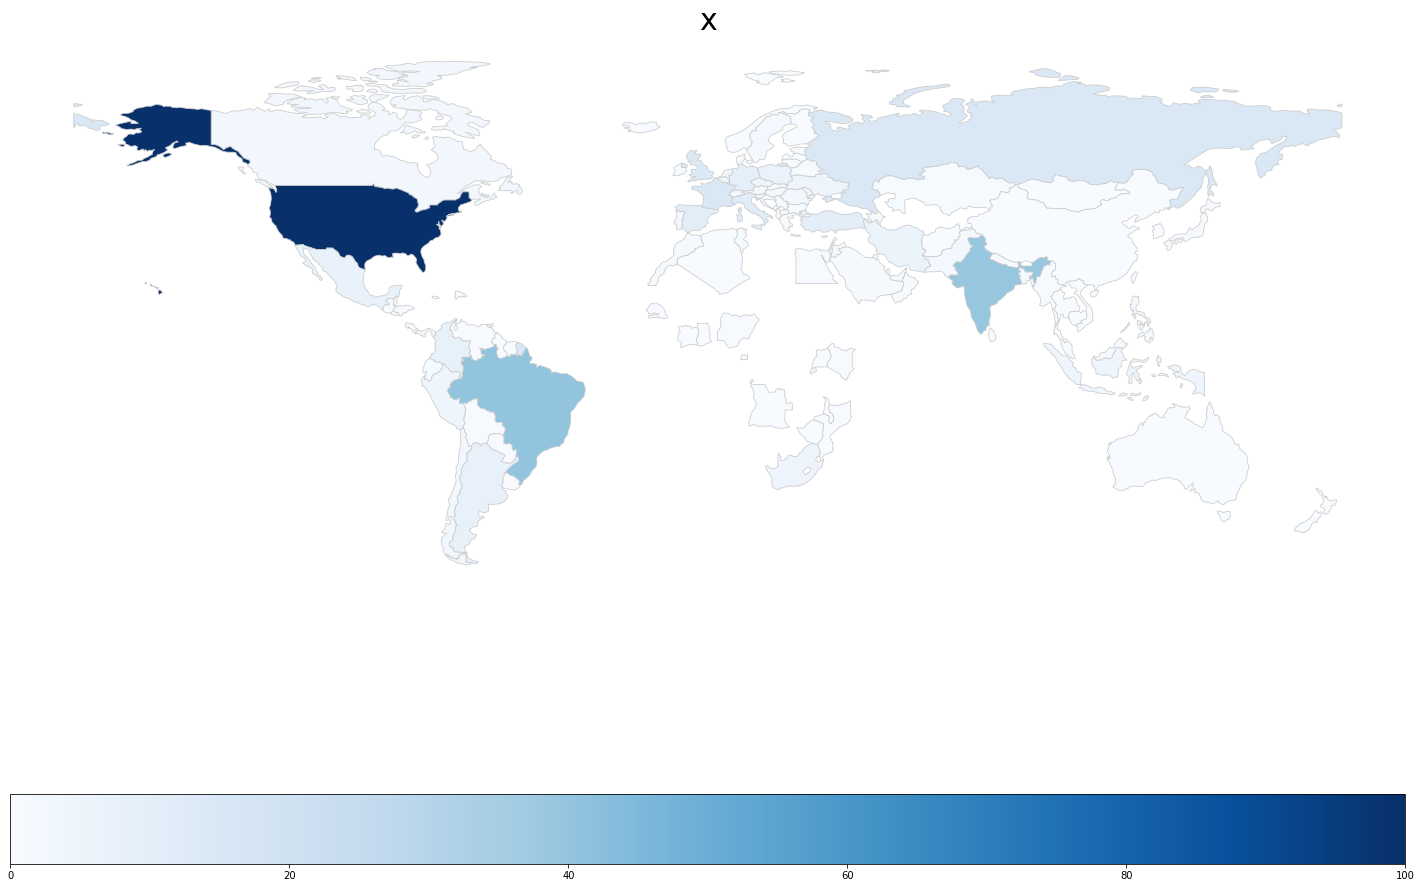

In [14]:
# Compare visually vaccination rates across world
graph_world('total_cases')

In [15]:
#join new map data to existing CV19 vaccine dataframe

#df2= df2[['country','iso_code','date','people_fully_vaccinated_per_hundred']]
#df2['people_fully_vaccinated_per_hundred']= df2.people_vaccinated_per_hundred.astype('int64')
#mapped = pd.merge(left=world, right=df2, left_on='iso_a3', right_on='iso_code')
mapped = world.set_index('iso_a3').join(df2.set_index('iso_code')).reset_index()
mapped.sample(15)

index    pop_est      continent                  name  gdp_md_est  \
4094   MNE     642550         Europe            Montenegro     10610.0   
235    ARG   44293293  South America             Argentina    879400.0   
2307   GBR   64769452         Europe        United Kingdom   2788000.0   
150    ARE    6072475           Asia  United Arab Emirates    667200.0   
2956   IRN   82021564           Asia                  Iran   1459000.0   
1822   ECU   16290913  South America               Ecuador    182400.0   
2675   HUN    9850845         Europe               Hungary    267600.0   
5329   SLV    6172011  North America           El Salvador     54790.0   
1694   DNK    5605948         Europe               Denmark    264800.0   
717    BLR    9549747         Europe               Belarus    165400.0   
1097   CHL   17789267  South America                 Chile    436100.0   
4745   POL   38476269         Europe                Poland   1052000.0   
3839   LVA    1944643         Europe                Latvia     50650.0   
3002   ISL     339747         Europe               Iceland     16150.0   
4691   PHL  104256076           Asia           Philippines    801900.0   

                                               geometry               country  \
4094  POLYGON ((20.07070 42.58863, 19.80161 42.50009...            Montenegro   
235   MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...             Argentina   
2307  MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...        United Kingdom   
150   POLYGON ((51.57952 24.24550, 51.75744 24.29407...  United Arab Emirates   
2956  POLYGON ((48.56797 29.92678, 48.01457 30.45246...                  Iran   
1822  POLYGON ((-75.37322 -0.15203, -75.23372 -0.911...               Ecuador   
2675  POLYGON ((22.08561 48.42226, 22.64082 48.15024...               Hungary   
5329  POLYGON ((-89.35333 14.42413, -89.05851 14.340...           El Salvador   
1694  MULTIPOLYGON (((9.92191 54.98310, 9.28205 54.8...               Denmark   
717   POLYGON ((28.17671 56.16913, 29.22951 55.91834...               Belarus   
1097  MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...                 Chile   
4745  POLYGON ((23.48413 53.91250, 23.52754 53.47012...                Poland   
3839  POLYGON ((27.28818 57.47453, 27.77002 57.24426...                Latvia   
3002  POLYGON ((-14.50870 66.45589, -14.73964 65.808...               Iceland   
4691  MULTIPOLYGON (((120.83390 12.70450, 120.32344 ...           Philippines   

            date  total_vaccinations  people_vaccinated  \
4094  2021-03-02                 NaN                NaN   
235   2021-02-16            611169.0           373253.0   
2307  2021-03-20          29859742.0         27630970.0   
150   2021-02-16           5198725.0                NaN   
2956  2021-03-15                 NaN                NaN   
1822  2021-02-21                 NaN                NaN   
2675  2021-02-24            719146.0           508043.0   
5329  2021-02-21                 NaN                NaN   
1694  2021-02-11            369473.0           210844.0   
717   2021-01-29                 NaN                NaN   
1097  2021-01-26             67384.0            57023.0   
4745  2021-02-12           2071009.0          1446102.0   
3839  2021-02-11             35272.0            19766.0   
3002  2021-02-09                 NaN                NaN   
4691  2021-03-17                 NaN                NaN   

      people_fully_vaccinated  daily_vaccinations  \
4094                      0.0               152.0   
235                  237916.0             13999.0   
2307                2228772.0            582660.0   
150                       0.0             95940.0   
2956                      0.0              3806.0   
1822                      0.0              1395.0   
2675                 211073.0             30443.0   
5329                      0.0              1200.0   
1694                 158629.0              8819.0   
717                       0.0               403.

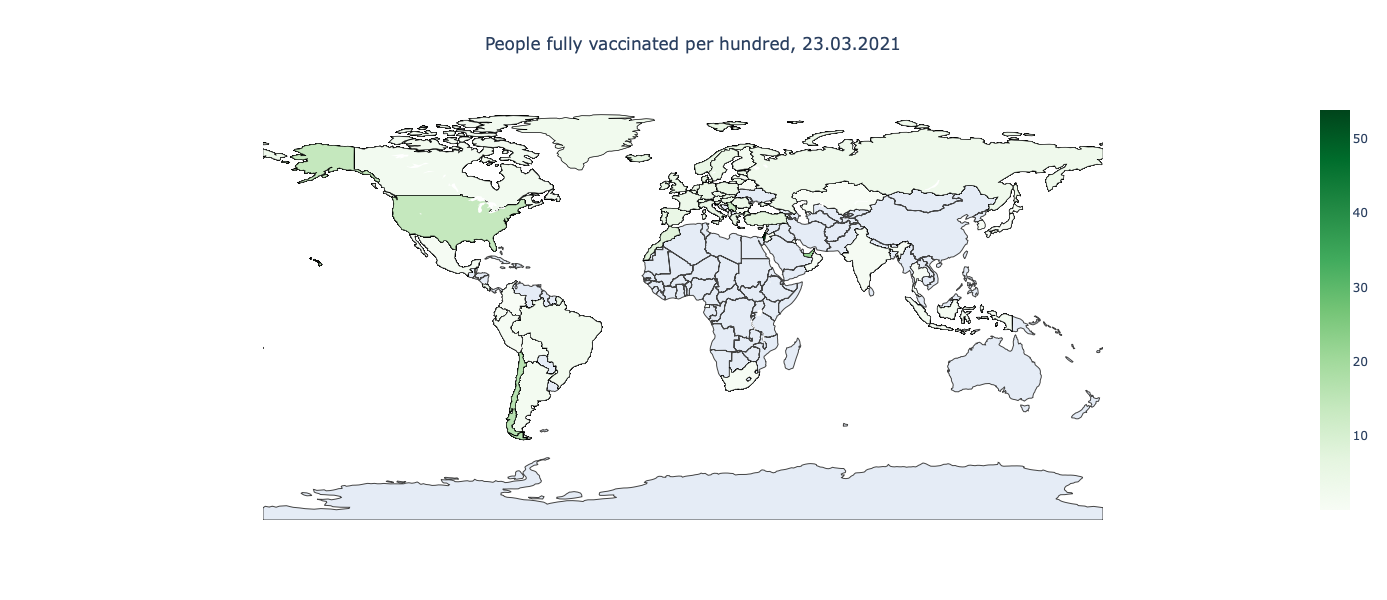

In [16]:
#mapped1 = mapped1.groupby(['country', 'date']).sort_values('date', ascending=False)
mapped = mapped[mapped['people_fully_vaccinated_per_hundred']>0]
# Create the Choropleth
fig = go.Figure(data=go.Choropleth(
    locations = mapped['country'],
    locationmode = 'country names',
    z = mapped['people_fully_vaccinated_per_hundred'],
    colorscale = 'greens',
    marker_line_color = 'black',
    marker_line_width = 0.5
)) 
fig.update_layout(
    title_text = 'People fully vaccinated per hundred, 23.03.2021',
    title_x = 0.5,width= 800,
        height= 600,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular',
        showcountries= True,
    )
)

In comparison to the total infections only the US has already a high vaccination progress with 16% of the population. Interesting is the high vaccination rate for Chile with also 16%. 
For the EU we find low but very similar vaccination progress per country with a rate of 3 to 4% people fully vaccinated. The EU sources the vaccines for all members together but is short of available doses.
UK has a different strategy with only partial vaccinations, so we have to consider them differently and they ordered vaccine quantities earlier and more successful than the EU.
Mentionable is also Serbia with a rate of 12.88%. They started with vaccines from BionTech/Pfizer and Sputnik V end of december and allowed the use of the chinese vaccine from Sinopharm mid of January. 

### People vaccinated per hundred in UK

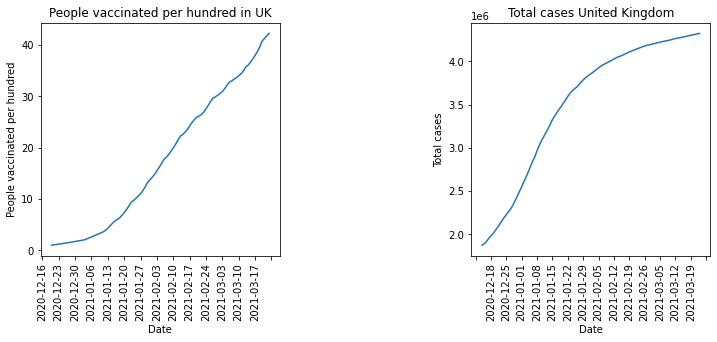

In [17]:
fig = plt.figure(figsize =(12,12))
fig.subplots_adjust(hspace=0.8, wspace=0.8)

ax = fig.add_subplot(2, 2, 1)
df2_uk = df2[df2.country == 'United Kingdom']
graph = sns.lineplot(data=df2_uk, x="date", y="people_vaccinated_per_hundred")
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
#graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
plt.xticks(rotation = 90)
plt.title('People vaccinated per hundred in UK')
plt.xlabel('Date')
plt.ylabel('People vaccinated per hundred')

ax = fig.add_subplot(2, 2, 2)
df2_uk_all = df_all_in[df_all_in.country == 'United Kingdom']
graph = sns.lineplot(data=df2_uk_all, x="date", y="total_cases")
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
#graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
plt.xticks(rotation = 90)
plt.title('Total cases United Kingdom')
plt.xlabel('Date')
plt.ylabel('Total cases')

plt.show();

UK mainly uses the vaccine from AstraZeneca and decided early to go for a partial vaccination strategy. With this strategy they  already are at a rate of over 40% of vaccinated people. We can see the reason for the partial strategy with looking at the total cases. UK had an high increase of infections starting end of december.

In [18]:
#function to create map graph
def graph_world(feature):
    to_be_mapped = feature
    vmin, vmax = 0,100
    fig, ax = plt.subplots(1, figsize=(25,25))

    mapped.plot(column=to_be_mapped, cmap='Blues', linewidth=0.8, ax=ax, edgecolors='0.8')
    ax.set_title('x', fontdict={'fontsize':30})
    ax.set_axis_off()

    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []

    cbar = fig.colorbar(sm, orientation='horizontal')

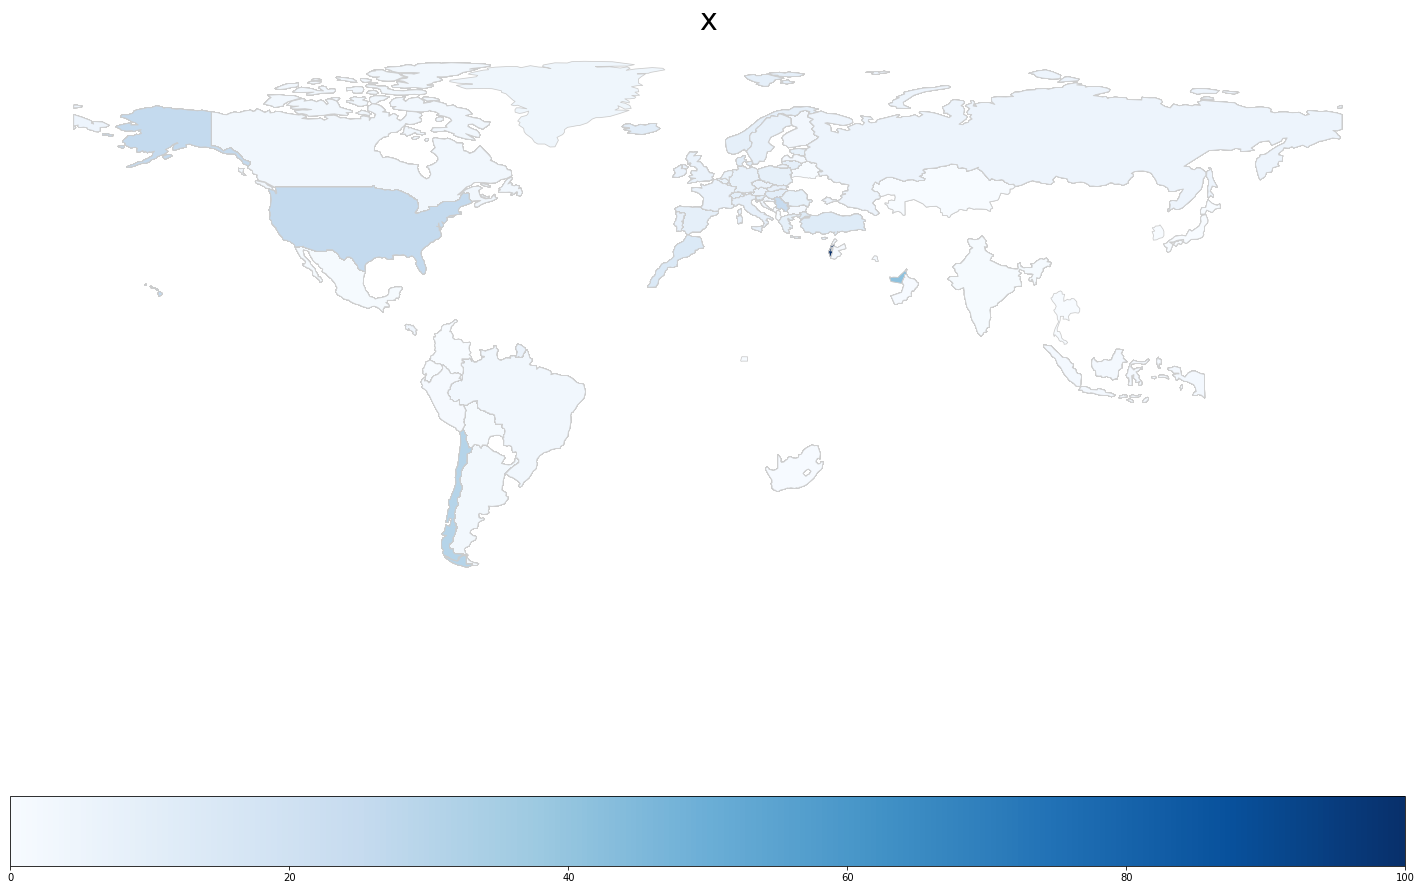

In [19]:
# Compare visually vaccination rates across world
graph_world('people_fully_vaccinated_per_hundred')

The world maps gives an overview of the progress in fully vaccinating people in relation to the population. We can see how different the progress by continent is. The empty 

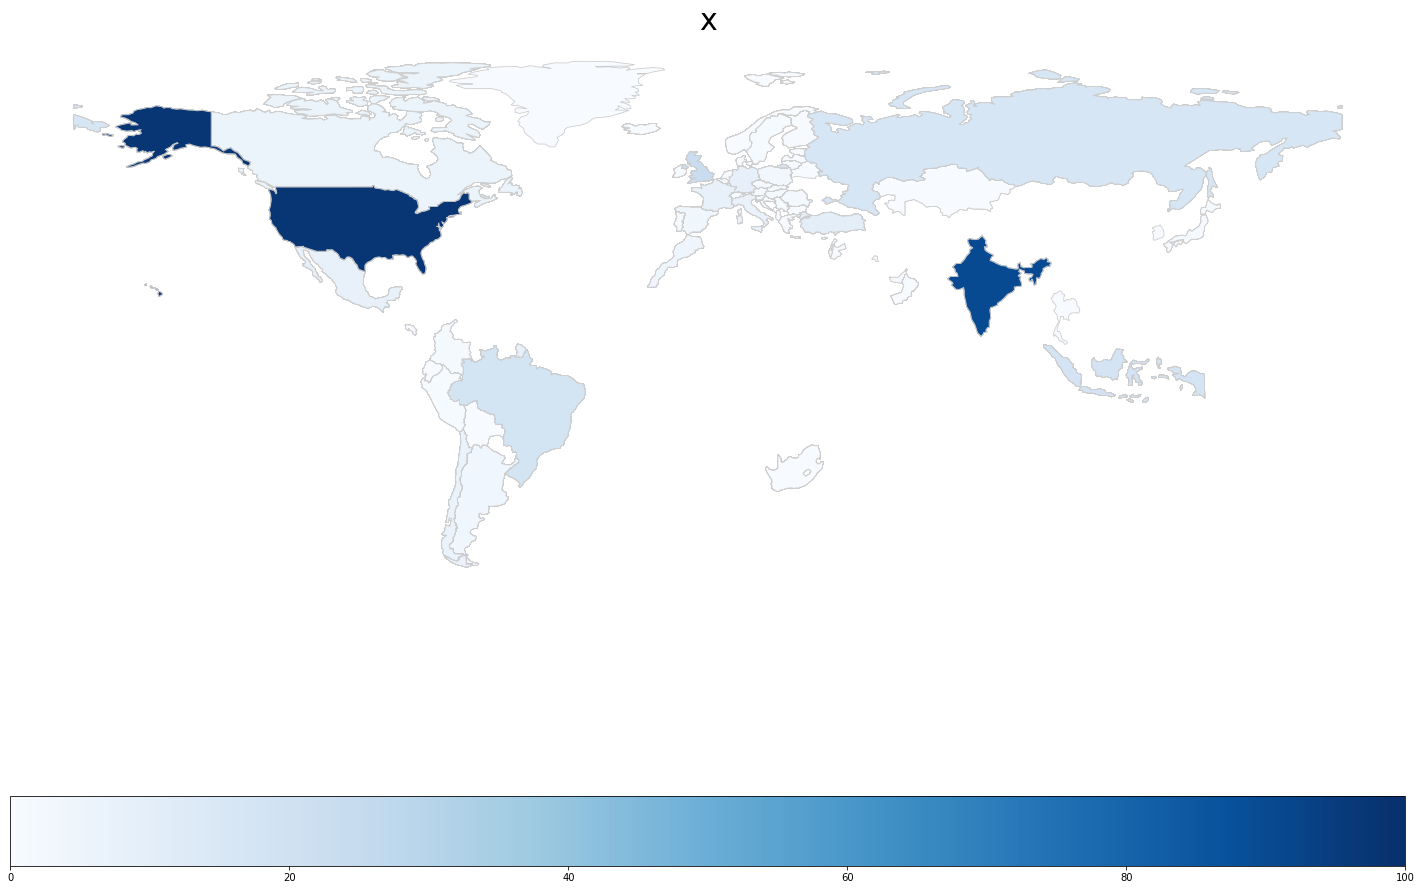

In [20]:
#daily vaccinations
graph_world('daily_vaccinations')

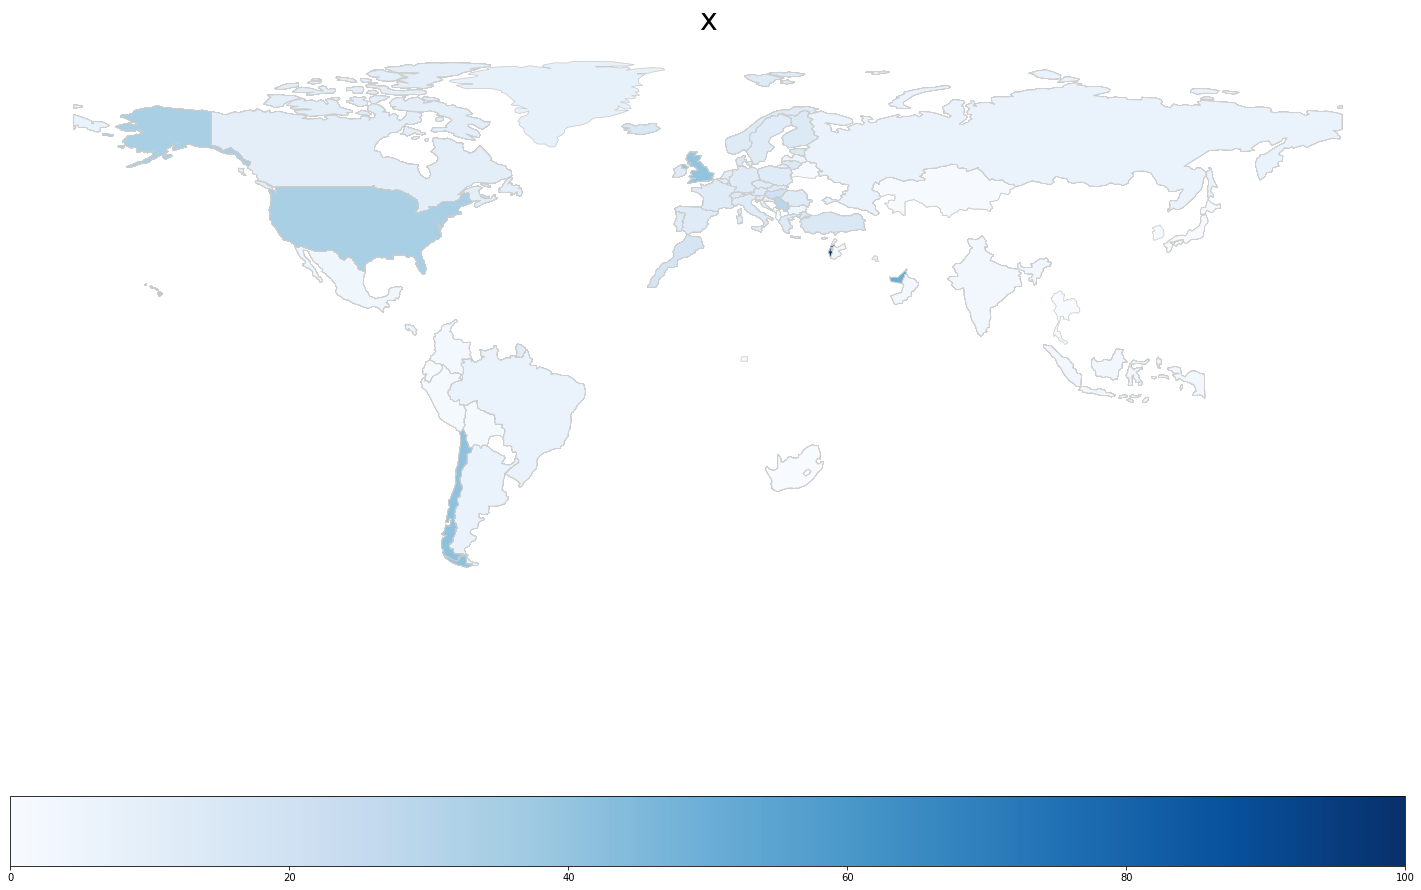

In [21]:
#total vaccinations per hundr
graph_world('total_vaccinations_per_hundred')

In [22]:
mapped.head()

index  pop_est continent                  name  gdp_md_est  \
66    ALB  3047987    Europe               Albania     33900.0   
74    ALB  3047987    Europe               Albania     33900.0   
75    ALB  3047987    Europe               Albania     33900.0   
79    ALB  3047987    Europe               Albania     33900.0   
113   ARE  6072475      Asia  United Arab Emirates    667200.0   

                                              geometry               country  \
66   POLYGON ((21.02004 40.84273, 20.99999 40.58000...               Albania   
74   POLYGON ((21.02004 40.84273, 20.99999 40.58000...               Albania   
75   POLYGON ((21.02004 40.84273, 20.99999 40.58000...               Albania   
79   POLYGON ((21.02004 40.84273, 20.99999 40.58000...               Albania   
113  POLYGON ((51.57952 24.24550, 51.75744 24.29407...  United Arab Emirates   

           date  total_vaccinations  people_vaccinated  \
66   2021-02-09              1127.0              689.0   
74   2021-02-17              1701.0             1090.0   
75   2021-02-18              3049.0             2438.0   
79   2021-02-22              6728.0             6073.0   
113  2021-01-10           1086568.0           836568.0   

     people_fully_vaccinated  daily_vaccinations  \
66                     438.0                82.0   
74                     611.0                72.0   
75                     611.0               254.0   
79                     655.0               739.0   
113                 250000.0             52053.0   

     total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
66                             0.04                           0.02   
74                             0.06                           0.04   
75                             0.11                           0.08   
79                             0.23                           0.21   
113                           10.99                           8.46   

     people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
66                                  0.02                            28.0   
74                                  0.02                            25.0   
75                                  0.02                            88.0   
79                                  0.02                           257.0   
113                                 2.53                          5263.0   

                                              vaccines  
66                                     Pfizer/BioNTech  
74                                     Pfizer/BioNTech  
75                                     Pfizer/BioNTech  
79                                     Pfizer/BioNTech  
113  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...

In [23]:
df2.tail()

country iso_code        date  total_vaccinations  people_vaccinated  \
7492  Zimbabwe      ZWE  2021-03-20             42210.0            42210.0   
7493  Zimbabwe      ZWE  2021-03-21             42729.0            42729.0   
7494  Zimbabwe      ZWE  2021-03-22             43294.0            43294.0   
7495  Zimbabwe      ZWE  2021-03-23             44135.0            44135.0   
7496  Zimbabwe      ZWE  2021-03-24             49404.0            49404.0   

      people_fully_vaccinated  daily_vaccinations  \
7492                      0.0               836.0   
7493                      0.0               910.0   
7494                      0.0               805.0   
7495                      0.0               655.0   
7496                      0.0              1400.0   

      total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
7492                            0.28                           0.28   
7493                            0.29                           0.29   
7494                            0.29                           0.29   
7495                            0.30                           0.30   
7496                            0.33                           0.33   

      people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
7492                                  0.0                            56.0   
7493                                  0.0                            61.0   
7494                                  0.0                            54.0   
7495                                  0.0                            44.0   
7496                                  0.0                            94.0   

               vaccines  
7492  Sinopharm/Beijing  
7493  Sinopharm/Beijing  
7494  Sinopharm/Beijing  
7495  Sinopharm/Beijing  
7496  Sinopharm/Beijing

In [24]:
#select last date:
df_last = df2.sort_values('date', ascending=False).groupby('country').tail(1)
df_last.sample(15)
df_last.shape

(144, 12)

In [25]:
df_last

country iso_code        date  \
6913                            Taiwan      TWN  2021-03-22   
6030  Saint Vincent and the Grenadines      VCT  2021-03-18   
4364                            Malawi      MWI  2021-03-18   
2218                 Equatorial Guinea      GNQ  2021-03-16   
6952                           Tunisia      TUN  2021-03-13   
...                                ...      ...         ...   
3514                            Israel      ISR  2020-12-20   
5800                            Russia      RUS  2020-12-16   
1486                             China      CHN  2020-12-16   
1209                            Canada      CAN  2020-12-15   
7213                    United Kingdom      GBR  2020-12-14   

      total_vaccinations  people_vaccinated  people_fully_vaccinated  \
6913              1578.0             1578.0                      0.0   
6030                 NaN                NaN                      0.0   
4364              9091.0             9091.0                      0.0   
2218              6565.0             5765.0                    800.0   
6952               743.0              743.0                      0.0   
...                  ...                ...                      ...   
3514              7401.0             7401.0                      0.0   
5800                 NaN                NaN                      0.0   
1486                 NaN                NaN                      0.0   
1209               723.0                NaN                      0.0   
7213                 NaN                NaN                      0.0   

      daily_vaccinations  total_vaccinations_per_hundred  \
6913              1578.0                            0.01   
6030               216.0                             NaN   
4364              3674.0                            0.05   
2218                 NaN                            0.47   
6952               743.0                            0.01   
...                  ...                             ...   
3514              7340.0                            0.09   
5800              3357.0                             NaN   
1486            187500.0                             NaN   
1209               718.0                            0.00   
7213             84117.0                             NaN   

      people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
6913                           0.01                                 0.00   
6030                            NaN                                 0.00   
4364                           0.05                                 0.00   
2218                           0.41                                 0.06   
6952                           0.01                                 0.00   
...                             ...                                  ...   
3514                           0.09                                 0.00   
5800                            NaN                                 0.00   
1486                            NaN                                 0.00   
1209                            NaN                                 0.00   
7213                            NaN                                 0.00   

      daily_vaccinations_per_million  \
6913                            66.0   
6030                          1947.0   
4364                           192.0   
2218                             NaN   
6952                            63.0   
...                              ...   
3514                           848.0   
5800                            23.0   
1486                           130.0   
1209                            19.0   
7213                          1239.0   

                                          vaccines  
6913                            Oxford/AstraZeneca  
6030                            Oxford/AstraZeneca  
4364                            Oxford/AstraZeneca  
2218                             Sinopharm/Beijing  
6952                    Pfize

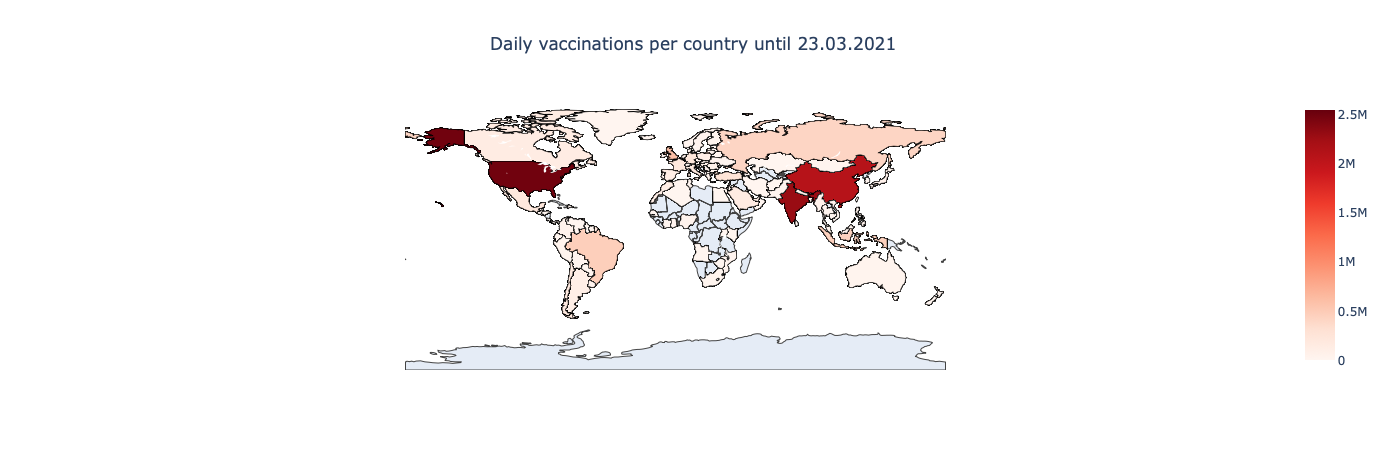

In [26]:

# Read Data
#df = pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")
# Rename columns
#df = df.rename(columns={'Country/Region':'Country'})
#df = df.rename(columns={'ObservationDate':'Date'})
# Manipulate Dataframe
df_daily_sum = df2.groupby(['country', 'date']).sum().reset_index().sort_values('date', ascending=False)
#df_last = df_last.drop_duplicates(subset = ['country'])
df_daily_sum = df2[df2['daily_vaccinations']>0]
# Create the Choropleth
fig = go.Figure(data=go.Choropleth(
    locations = df_daily_sum['country'],
    locationmode = 'country names',
    z = df_daily_sum['daily_vaccinations'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))
fig.update_layout(
    title_text = 'Daily vaccinations per country until 23.03.2021',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular',
        showcountries= True,
    )
)
#noch nicht ganz richtig! Es sind noch nicht die aufsummierten anzahlen...

In [27]:
df6.head()

country        date Covaxin, Oxford/AstraZeneca  \
0  Afghanistan  2021-02-23                         NaN   
1  Afghanistan  2021-02-24                         NaN   
2  Afghanistan  2021-02-25                         NaN   
3  Afghanistan  2021-02-26                         NaN   
4  Afghanistan  2021-02-27                         NaN   

  EpiVacCorona, Sputnik V Johnson&Johnson  \
0                     NaN             NaN   
1                     NaN             NaN   
2                     NaN             NaN   
3                     NaN             NaN   
4                     NaN             NaN   

  Johnson&Johnson, Moderna, Pfizer/BioNTech Moderna  \
0                                       NaN     NaN   
1                                       NaN     NaN   
2                                       NaN     NaN   
3                                       NaN     NaN   
4                                       NaN     NaN   

  Moderna, Oxford/AstraZeneca Moderna, Oxford/AstraZeneca, Pfizer/BioNTech  \
0                         NaN                                          NaN   
1                         NaN                                          NaN   
2                         NaN                                          NaN   
3                         NaN                                          NaN   
4                         NaN                                          NaN   

  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V  \
0                                                NaN                           
1                                                NaN                           
2                                                NaN                           
3                                                NaN                           
4                                                NaN                           

   ... iso_code total_vaccinations people_vaccinated people_fully_vaccinated  \
0  ...      NaN                NaN               NaN                     NaN   
1  ...      AFG                NaN               NaN                     0.0   
2  ...      AFG                NaN               NaN                     0.0   
3  ...      AFG                NaN               NaN                     0.0   
4  ...      AFG                NaN               NaN                     0.0   

  daily_vaccinations total_vaccinations_per_hundred  \
0                NaN                            NaN   
1             1367.0                            NaN   
2             1367.0                            NaN   
3             1367.0                            NaN   
4             1367.0                            NaN   

  people_vaccinated_per_hundred people_fully_vaccinated_per_hundred  \
0                           NaN                                 NaN   
1                           NaN                                 0.0   
2                           NaN                                 0.0   
3                           NaN                                 0.0   
4                           NaN                                 0.0   

  daily_vaccinations_per_million cgrouped  
0                            NaN     Asia  
1                           35.0     Asia  
2                           35.0     Asia  
3                           35.0     Asia  
4                           35.0     Asia  

[5 rows x 38 columns]

In [28]:
df6_region = df6[(df6.cgrouped == 'Europe') | (df6.cgrouped == 'North_America')]

In [29]:
df6_region.head()

country        date Covaxin, Oxford/AstraZeneca EpiVacCorona, Sputnik V  \
22  Albania  2021-01-11                         NaN                     NaN   
23  Albania  2021-01-12                         NaN                     NaN   
24  Albania  2021-01-13                         NaN                     NaN   
25  Albania  2021-01-14                         NaN                     NaN   
26  Albania  2021-01-15                         NaN                     NaN   

   Johnson&Johnson Johnson&Johnson, Moderna, Pfizer/BioNTech Moderna  \
22             NaN                                       NaN     NaN   
23             NaN                                       NaN     NaN   
24             NaN                                       NaN     NaN   
25             NaN                                       NaN     NaN   
26             NaN                                       NaN     NaN   

   Moderna, Oxford/AstraZeneca Moderna, Oxford/AstraZeneca, Pfizer/BioNTech  \
22                         NaN                                          NaN   
23                         NaN                                          NaN   
24                         NaN                                          NaN   
25                         NaN                                          NaN   
26                         NaN                                          NaN   

   Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V  \
22                                                NaN                           
23                                                NaN                           
24                                                NaN                           
25                                                NaN                           
26                                                NaN                           

    ... iso_code total_vaccinations people_vaccinated people_fully_vaccinated  \
22  ...      AFG            54000.0           54000.0                     0.0   
23  ...      NaN                NaN               NaN                     NaN   
24  ...      ALB                NaN               NaN                     0.0   
25  ...      ALB              128.0             128.0                     0.0   
26  ...      ALB              188.0             188.0                     0.0   

   daily_vaccinations total_vaccinations_per_hundred  \
22             2862.0                           0.14   
23                NaN                            NaN   
24               64.0                            NaN   
25               64.0                           0.00   
26               63.0                           0.01   

   people_vaccinated_per_hundred people_fully_vaccinated_per_hundred  \
22                          0.14                                 0.0   
23                           NaN                                 NaN   
24                           NaN                                 0.0   
25                          0.00                                 0.0   
26                          0.01                                 0.0   

   daily_vaccinations_per_million cgrouped  
22                           74.0   Europe  
23                            NaN   Europe  
24                           22.0   Europe  
25                           22.0   Europe  
26                           22.0   Europe  

[5 rows x 38 columns]

## Groupby Countries & Regions

### Which country is the fastest vaccinating its people?

We got a first overview with the worldmaps and will now get a deeper insight in the fastest vaccinating countries.

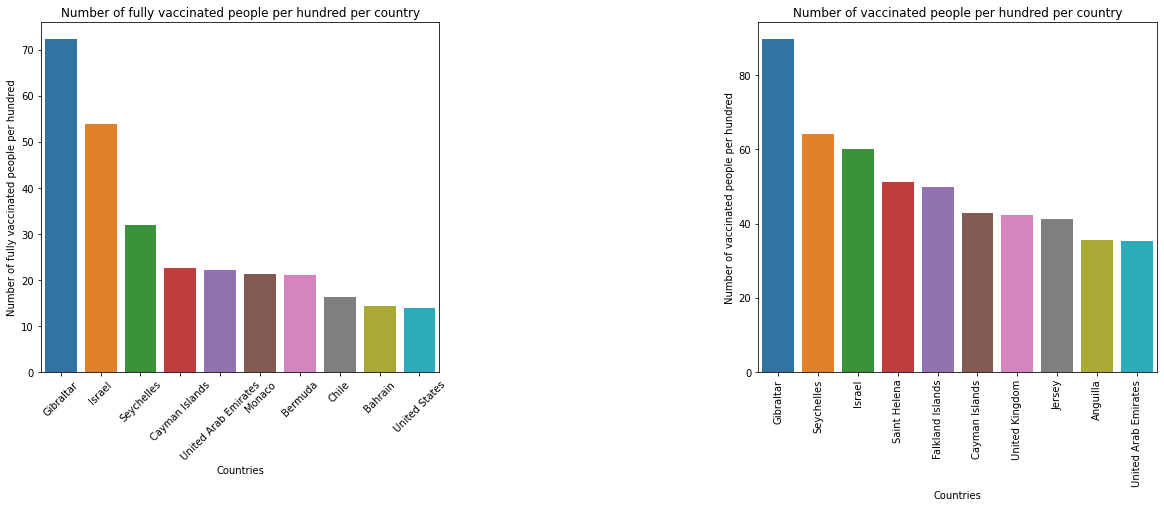

In [44]:
fig = plt.figure(figsize =(20,18))
fig.subplots_adjust(hspace=0.8, wspace=0.8)



ax = fig.add_subplot(2, 2, 1)

col_vacc = ['country', 'vaccines','people_fully_vaccinated_per_hundred']
vacc_am_bycountry = df2[col_vacc].groupby('country').max().sort_values('people_fully_vaccinated_per_hundred', ascending=False).dropna(subset=['people_fully_vaccinated_per_hundred'])
vacc_am_bycountry = vacc_am_bycountry.iloc[:10]

vacc_am_bycountry = vacc_am_bycountry.sort_values('people_fully_vaccinated_per_hundred', ascending=False)

#plt.figure(figsize=(8, 8))
graph = sns.barplot(vacc_am_bycountry.index, vacc_am_bycountry.people_fully_vaccinated_per_hundred)
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 1))
plt.title('Number of fully vaccinated people per hundred per country')
plt.ylabel('Number of fully vaccinated people per hundred')
plt.xlabel('Countries')
plt.xticks(rotation=45)


ax = fig.add_subplot(2, 2, 2)

col_vacc = ['country', 'vaccines','people_vaccinated_per_hundred']
vacc_am_bycountry = df2[col_vacc].groupby('country').max().sort_values('people_vaccinated_per_hundred', ascending=False).dropna(subset=['people_vaccinated_per_hundred'])
vacc_am_bycountry = vacc_am_bycountry.iloc[:10]

vacc_am_bycountry = vacc_am_bycountry.sort_values('people_vaccinated_per_hundred', ascending=False)

#plt.figure(figsize=(8, 8))
graph = sns.barplot(vacc_am_bycountry.index, vacc_am_bycountry.people_vaccinated_per_hundred)
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 1))
plt.title('Number of vaccinated people per hundred per country')
plt.ylabel('Number of vaccinated people per hundred')
plt.xlabel('Countries')
plt.xticks(rotation=90)

plt.show();

Until 24.03.2021 Gibraltar is clearly leading in fully vaccinating its citizens. Followed by Israel and Seychelles. Gibraltar is part of British Overseas Territory and the UK vaccination program also includes procurement of vaccines for British Overseas Territories and Crown Dependencies. 

Let's have a look at the population and GDP per country:

Gibraltar: 33691 citizens (UK: 502 billion USD in 2020, citizen: 67 millions plus 272 000 citizens British Oversea)

Israel: 8.7 million citizens and a GDP of 334 billions USD  in 2020

Seychelles: 98000 citizens and a GDP of 1.4 billion USD in 2020.

It is obvious that smaller countries are leading and when we have a look at the next plots, we see how much more effort larger countries have to do.


### Which country vaccinated the most (absolute)?

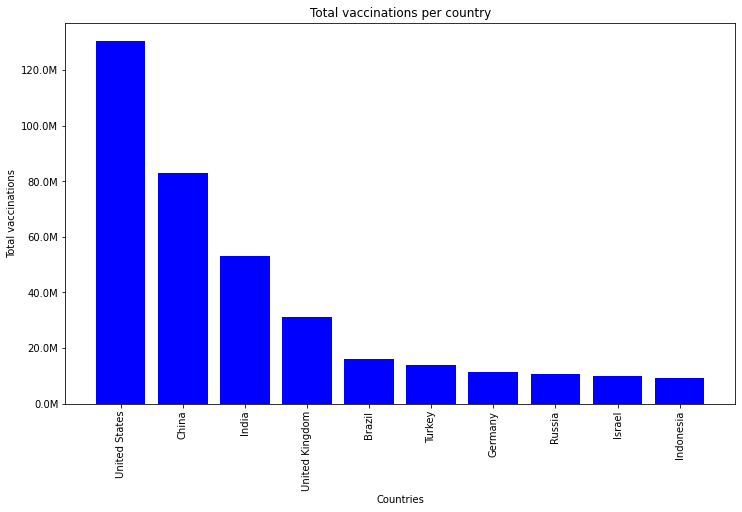

In [31]:
col_vacc = ['country', 'total_vaccinations', 'vaccines']
vacc_am_bycountry = df2[col_vacc].groupby('country').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])
vacc_am_bycountry = vacc_am_bycountry.iloc[:10]

fig, ax = plt.subplots(figsize=(12,7))

plt.bar(vacc_am_bycountry.index, vacc_am_bycountry.total_vaccinations, color = 'b')

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)

plt.title('Total vaccinations per country')

ax.yaxis.set_major_formatter(formatter)
plt.xticks(rotation = 90)
plt.ylabel('Total vaccinations')
plt.xlabel('Countries')
plt.show();

This chart shows the enourmous effort larger countries have to do in vaccinating their citizens. United States already vaccinated over 130 million doses and have only 25% of their cititzens vaccinated but Israel with only 9 million citizens has already vaccinated 60% of its population.

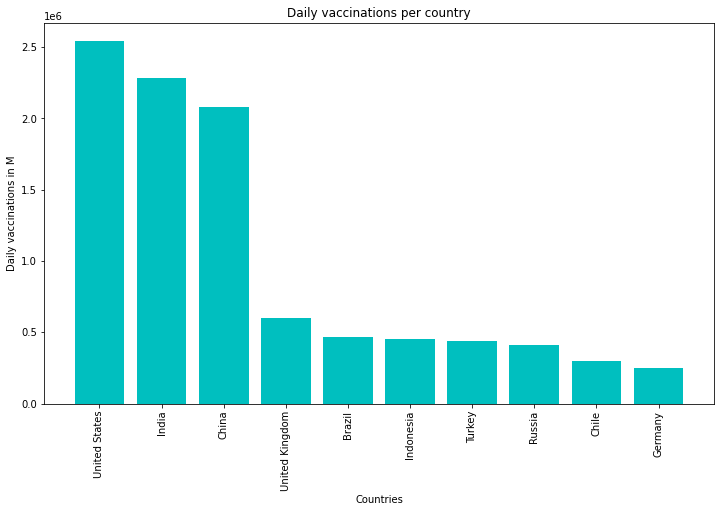

In [32]:
#Groupby daily vaccinations

col_vacc = ['country', 'daily_vaccinations', 'vaccines']
vacc_am_bycountry = df2[col_vacc].groupby('country').max().sort_values('daily_vaccinations', ascending=False).dropna(subset=['daily_vaccinations'])
vacc_am_bycountry = vacc_am_bycountry.iloc[:10]

plt.figure(figsize=(12, 7))
plt.bar(vacc_am_bycountry.index, vacc_am_bycountry.daily_vaccinations, color = 'c')

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)

ax.yaxis.set_major_formatter(formatter)

plt.title('Daily vaccinations per country')
plt.xticks(rotation = 90)
plt.ylabel('Daily vaccinations in M')
plt.xlabel('Countries')
plt.show();

United Stated vaccinates over 2.5 M people daily, Germany is only around 250.000 but still in the Top 10.

### How is the vaccination progress by region?

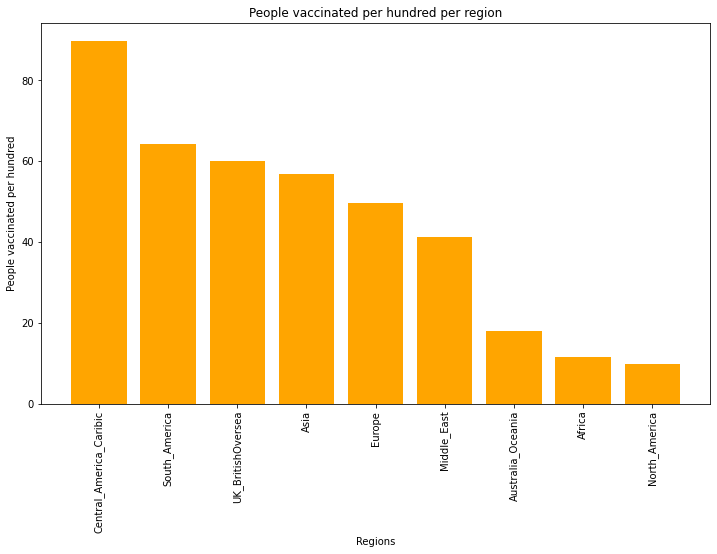

In [33]:
#Groupby regions:
col_vacc = ['cgrouped', 'people_vaccinated_per_hundred']
vacc_am_bycountry = df6[col_vacc].groupby('cgrouped').max().sort_values('people_vaccinated_per_hundred', ascending=False).dropna(subset=['people_vaccinated_per_hundred'])
vacc_am_bycountry = vacc_am_bycountry.iloc[:10]

plt.figure(figsize=(12, 7))
plt.bar(vacc_am_bycountry.index, vacc_am_bycountry.people_vaccinated_per_hundred, color = 'orange')

plt.title('People vaccinated per hundred per region')
plt.xticks(rotation = 90)
plt.ylabel('People vaccinated per hundred')
plt.xlabel('Regions')
plt.show();

Central America and Caribic is surprising in leading in number of vaccinated people per hundred. So let's have a closer look which countries are leading here:

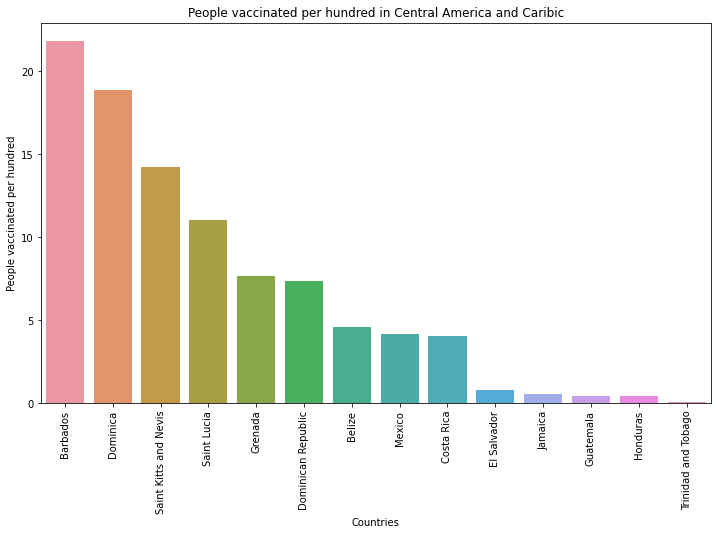

In [34]:
Central_America_Caribic = ['Antigua and Barbuda','Bahamas','Barbados','Belize','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago']

country_cenAm = df2[df2.country.isin(Central_America_Caribic)]
col_vacc = ['country', 'vaccines','people_vaccinated_per_hundred']

country_cenAm1 = country_cenAm[col_vacc].groupby('country').max().sort_values('people_vaccinated_per_hundred', ascending=False).dropna(subset=['people_vaccinated_per_hundred'])
country_cenAm1 = country_cenAm1.iloc[:20] 
country_cenAm1= country_cenAm1.sort_values('people_vaccinated_per_hundred', ascending=False)
#vacc_am_bycountry = df2[col_vacc].groupby('country').max().sort_values('people_vaccinated_per_hundred', ascending=False).dropna(subset=['people_vaccinated_per_hundred'])
#vacc_am_bycountry = vacc_am_bycountry.iloc[:20]

#vacc_am_bycountry = vacc_am_bycountry.sort_values('people_vaccinated_per_hundred', ascending=False)

plt.figure(figsize=(12, 7))
#plt.bar(country_cenAm.index, country_cenAm.people_vaccinated_per_hundred, color = 'orange')
sns.barplot(country_cenAm1.index, country_cenAm1.people_vaccinated_per_hundred)
plt.title('People vaccinated per hundred in Central America and Caribic')
plt.xticks(rotation = 90)
plt.ylabel('People vaccinated per hundred')
plt.xlabel('Countries')
plt.show();




With having a detailled look at the countries we see that again a small country brings the statistic up. Barbados has a population of 287 000 citizens and is middle income country with a GDP of 5.2 billions USD in 2019. More surprising is Dominica as it is one of the poorest of the Caribbean countries. 

Country plot for South America:

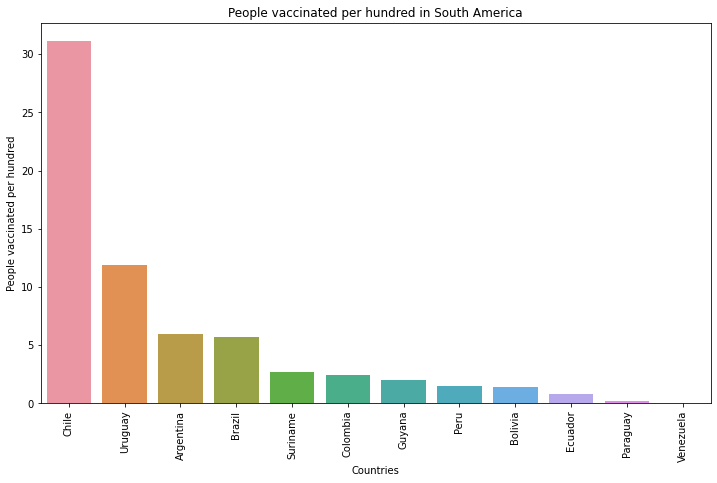

In [35]:
South_America = ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela']
country_SouthAm = df2[df2.country.isin(South_America)]
col_vacc = ['country', 'vaccines','people_vaccinated_per_hundred']

country_SouthAm1 = country_SouthAm[col_vacc].groupby('country').max().sort_values('people_vaccinated_per_hundred', ascending=False).dropna(subset=['people_vaccinated_per_hundred'])
country_SouthAm1 = country_SouthAm1.iloc[:20] 
country_SouthAm1 = country_SouthAm1.sort_values('people_vaccinated_per_hundred', ascending=False)
#vacc_am_bycountry = df2[col_vacc].groupby('country').max().sort_values('people_vaccinated_per_hundred', ascending=False).dropna(subset=['people_vaccinated_per_hundred'])
#vacc_am_bycountry = vacc_am_bycountry.iloc[:20]

#vacc_am_bycountry = vacc_am_bycountry.sort_values('people_vaccinated_per_hundred', ascending=False)

plt.figure(figsize=(12, 7))
#plt.bar(country_cenAm.index, country_cenAm.people_vaccinated_per_hundred, color = 'orange')
sns.barplot(country_SouthAm1.index, country_SouthAm1.people_vaccinated_per_hundred)
plt.title('People vaccinated per hundred in South America')
plt.xticks(rotation = 90)
plt.ylabel('People vaccinated per hundred')
plt.xlabel('Countries')
plt.show();




For South America Chile is the only country with an significant vaccination progress. 

Country plot Asia

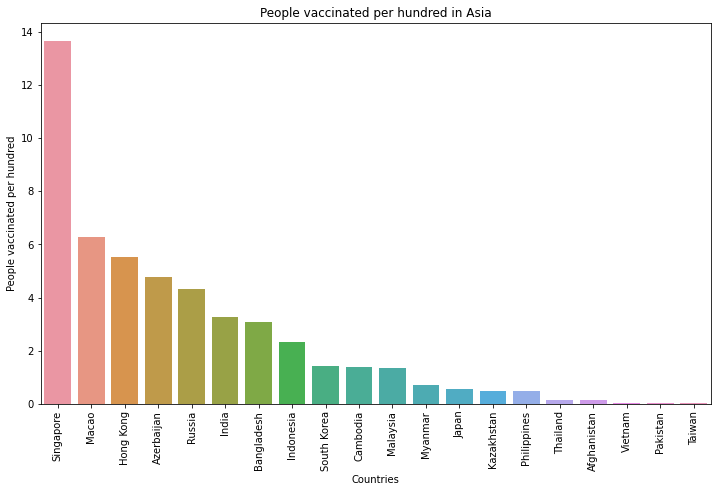

In [36]:
Asia = ['Afghanistan','Azerbaijan','Bangladesh','Bhutan','Brunei','Cambodia','China','East Timor','Hong Kong','India','Indonesia','Japan','Kazakhstan','Kyrgyzstan','Laos','Macao','Malaysia','Maldives','Mongolia','Myanmar','Nepal','North Korea','Pakistan','Philippines','Russia','Singapore','South Korea','Sri Lanka','Taiwan','Tajikistan','Thailand','Turkmenistan','Uzbekistan','Vietnam']
    
country_Asia = df2[df2.country.isin(Asia)]
col_vacc = ['country', 'vaccines','people_vaccinated_per_hundred']

country_Asia1 = country_Asia[col_vacc].groupby('country').max().sort_values('people_vaccinated_per_hundred', ascending=False).dropna(subset=['people_vaccinated_per_hundred'])
country_Asia1 = country_Asia1.iloc[:20] 
country_Asia1 = country_Asia1.sort_values('people_vaccinated_per_hundred', ascending=False)


plt.figure(figsize=(12, 7))
#plt.bar(country_cenAm.index, country_cenAm.people_vaccinated_per_hundred, color = 'orange')
sns.barplot(country_Asia1.index, country_Asia1.people_vaccinated_per_hundred)
plt.title('People vaccinated per hundred in Asia')
plt.xticks(rotation = 90)
plt.ylabel('People vaccinated per hundred')
plt.xlabel('Countries')
plt.show();



Singapore is a rich city-state with a population of 5.6 millions and a gdp of 372 billions USD in 2019. In comparison with other states it shows a slow vaccination progress with not even 14% people vaccinated per hundred (partial or fully) and also South Korea and Japan are far away from a successful vaccination start.

Country plot Africa

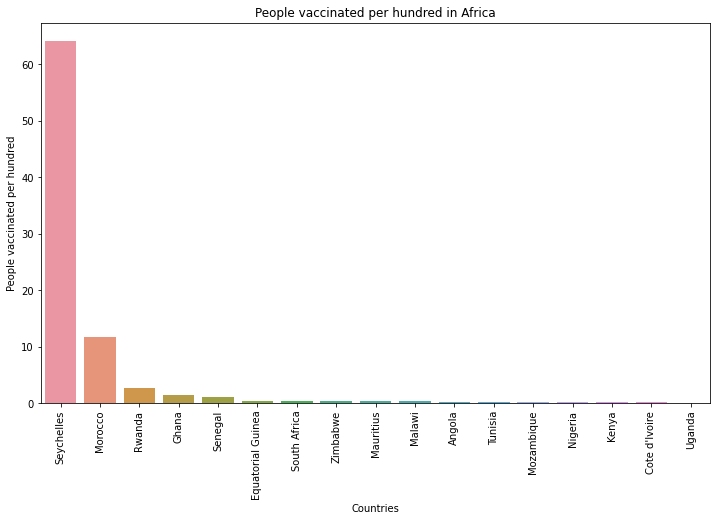

In [37]:
Africa = ['Algeria','Angola','Chad','Congo', "Cote d'Ivoire",'Egypt','Equatorial Guinea','Ghana','Guinea','Kenya','Malawi','Maldives','Mali','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe', 'Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Western Sahara', 'Zambia','Zimbabwe']

country_Africa = df2[df2.country.isin(Africa)]
col_vacc = ['country', 'vaccines','people_vaccinated_per_hundred']

country_Africa1 = country_Africa[col_vacc].groupby('country').max().sort_values('people_vaccinated_per_hundred', ascending=False).dropna(subset=['people_vaccinated_per_hundred'])
country_Africa1 = country_Africa1.iloc[:20] 
country_Africa1 = country_Africa1.sort_values('people_vaccinated_per_hundred', ascending=False)


plt.figure(figsize=(12, 7))
#plt.bar(country_cenAm.index, country_cenAm.people_vaccinated_per_hundred, color = 'orange')
sns.barplot(country_Africa1.index, country_Africa1.people_vaccinated_per_hundred)
plt.title('People vaccinated per hundred in Africa')
plt.xticks(rotation = 90)
plt.ylabel('People vaccinated per hundred')
plt.xlabel('Countries')
plt.show();
   

The vaccinations process for Africa does not really exist until mid of march. 

Country plot Middle_East

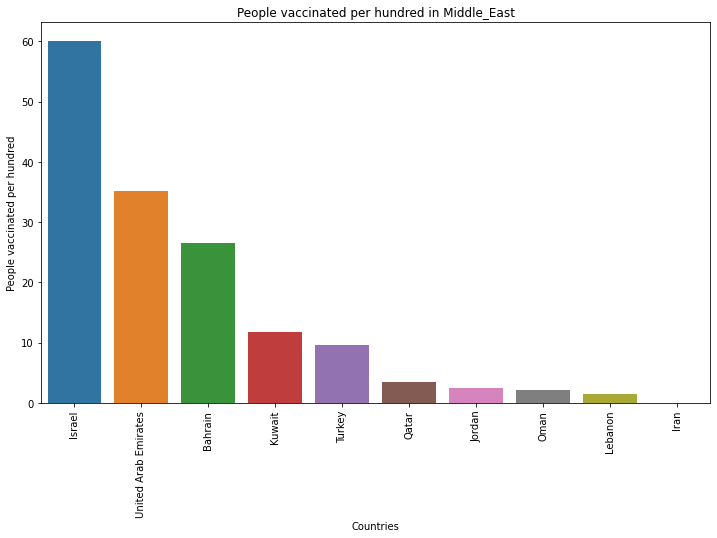

In [38]:
Middle_East = ['Bahrain','Iran','Iraq','Israel','Jordan','Kuwait','Lebanon','Oman','Qatar','Saudi Arabia','Syria','Turkey','United Arab Emirates','Yemen']

country_Middle_East = df2[df2.country.isin(Middle_East)]
col_vacc = ['country', 'vaccines','people_vaccinated_per_hundred']

country_Middle_East1 = country_Middle_East[col_vacc].groupby('country').max().sort_values('people_vaccinated_per_hundred', ascending=False).dropna(subset=['people_vaccinated_per_hundred'])
country_Middle_East1 = country_Middle_East1.iloc[:20] 
country_Middle_East1 = country_Middle_East1.sort_values('people_vaccinated_per_hundred', ascending=False)


plt.figure(figsize=(12, 7))
#plt.bar(country_cenAm.index, country_cenAm.people_vaccinated_per_hundred, color = 'orange')
sns.barplot(country_Middle_East1.index, country_Middle_East1.people_vaccinated_per_hundred)
plt.title('People vaccinated per hundred in Middle_East')
plt.xticks(rotation = 90)
plt.ylabel('People vaccinated per hundred')
plt.xlabel('Countries')
plt.show();

The successful vaccination progress for Israel we have seen before. Second in the list are the United Arab Emirates(UAE) which is the wealthiest country in the Middle East, followed by Bahrain and Kuwait. 

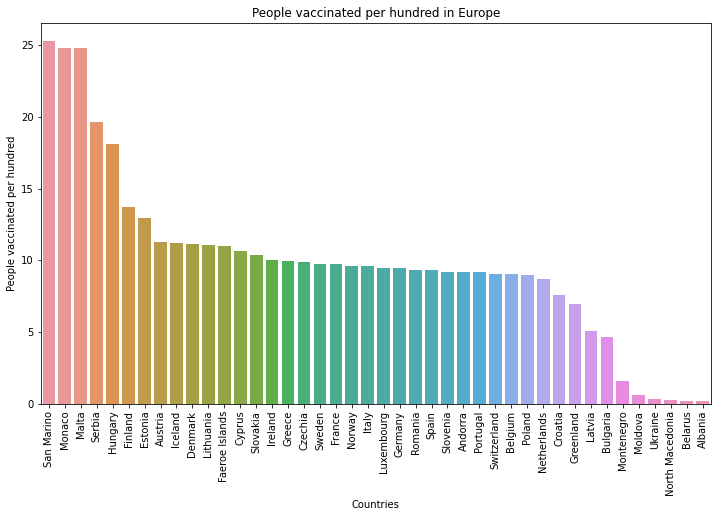

In [39]:
Europe = ('Albania','Andorra','Armenia','Austria','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Faeroe Islands','Finland','France','Georgia','Germany','Greece','Greenland','Hungary','Iceland','Ireland','Italy','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','North Macedonia','Northern Cyprus','Norway','Poland','Portugal','Romania','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','Vatican City')

country_Europe = df2[df2.country.isin(Europe)]
col_vacc = ['country', 'vaccines','people_vaccinated_per_hundred']

country_Europe1 = country_Europe[col_vacc].groupby('country').max().sort_values('people_vaccinated_per_hundred', ascending=False).dropna(subset=['people_vaccinated_per_hundred'])
country_Europe1 = country_Europe1.iloc[:45] 
country_Europe1 = country_Europe1.sort_values('people_vaccinated_per_hundred', ascending=False)


plt.figure(figsize=(12, 7))
#plt.bar(country_cenAm.index, country_cenAm.people_vaccinated_per_hundred, color = 'orange')
sns.barplot(country_Europe1.index, country_Europe1.people_vaccinated_per_hundred)
plt.title('People vaccinated per hundred in Europe')
plt.xticks(rotation = 90)
plt.ylabel('People vaccinated per hundred')
plt.xlabel('Countries')
plt.show();

## Detailed vaccination progress for sample countries

A more detailed time series analysis has been done separately. Here we selected the daily distributions for the US, China, India and Germany.

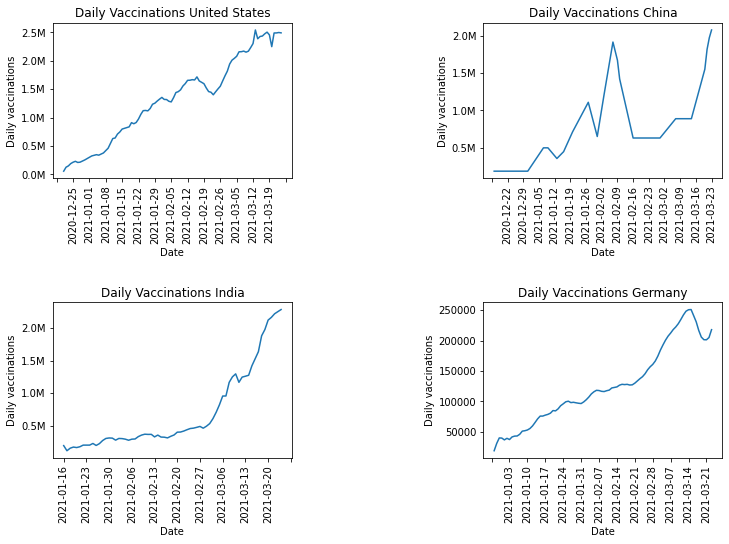

In [43]:

fig = plt.figure(figsize =(12,8))
fig.subplots_adjust(hspace=0.8, wspace=0.8)


def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)


ax = fig.add_subplot(2, 2, 1)
df2_us = df2[df2.country == 'United States']
graph = sns.lineplot(data=df2_us, x="date", y="daily_vaccinations")
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

#graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
plt.xticks(rotation = 90)
plt.title('Daily Vaccinations United States')
plt.xlabel('Date')
plt.ylabel('Daily vaccinations')

ax = fig.add_subplot(2, 2, 2)
df2_cn = df2[df2.country == 'China']
graph = sns.lineplot(data=df2_cn, x="date", y="daily_vaccinations")
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
#graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)


plt.xticks(rotation = 90)
plt.title('Daily Vaccinations China')
plt.xlabel('Date')
plt.ylabel('Daily vaccinations')

ax = fig.add_subplot(2, 2, 3)
df2_india = df2[df2.country == 'India']
graph = sns.lineplot(data=df2_india, x="date", y="daily_vaccinations")
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
#graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)


plt.xticks(rotation = 90)
plt.title('Daily Vaccinations India')
plt.xlabel('Date')
plt.ylabel('Daily vaccinations')

ax = fig.add_subplot(2, 2, 4)
df2_Germany = df2[df2.country == 'Germany']
graph = sns.lineplot(data=df2_Germany, x="date", y="daily_vaccinations")
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
#graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
plt.xticks(rotation = 90)
plt.title('Daily Vaccinations Germany')
plt.xlabel('Date')
plt.ylabel('Daily vaccinations')
plt.show();



We see very different vaccination progress for the four selected countries. 

- United states: fast increase, only small downs

- China: a lot of extreme up and downs. 

- Germany: slow increase and one bigger decrease end of march. This decrease were caused by the stop of vaccinations with AstraZeneca because of rare but dangerous side effects. 

- India: slow start but since end of February strong increase in vaccinations.


# Conclusion

Taking into account that the development of any vaccines against Covid-19 was extreme fast and that production needs time, it is interesting which countries have vaccine doses available from the beginning and how fast they can use it.
The vaccination progress in general depends on:
- availability of enough vaccine doses
- infrastructure (especially if extreme cooling is required)
- availability of health staff
- buying power per country
- approval of vaccines


Is being a rich country a driver for a fast vaccination process or are high infection rates accelerating the process?

The most cases we see for the United States with 29.9 millions, Brazil and India. The infections for China are very low with approx. 100.000 officially announced cases. In Europe, France and UK have the highest number with 4 million cases each followed by Spain and Italy.

### - Which country is the fastest  vaccinating its people?

Until 24.03.2021 Gibraltar is clearly leading in fully vaccinating its citizens. Followed by Israel and Seychelles. Gibraltar is part of British Overseas Territory and the UK vaccination program also includes procurement of vaccines for British Overseas Territories and Crown Dependencies.

### - Which country vaccinated the most (absolute)?

The United States have 320 million citizens and they already vaccinated over 130 million doses. They vaccinated much more than any other country. In comparions Israel vaccinated 60% of its population  but they only have 9 million citizens. China, India and UK are the  next with the highest number of vaccination. Looking at the GDP rank below, we can see that all countries are in the top 10 Gross domestic product (GDP) ranking. Also the next countries Turkey and Brazil are under the top 20.

---

Rank	Country/Territory	GDP(US$million)
     
1	 United States	22,675,271

2	 China[n 2]	16,642,318

3	 Japan	5,378,136

4	 Germany	4,319,286

5	 United Kingdom	3,124,650

6	 India	3,049,704

7	 France	2,938,271

8	 Italy	2,106,287

9	 Canada	1,883,487

10	 South Korea	1,806,70

(source: Wikipedia: https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal))

----

### - How is the vaccination progress by region?

The vaccination progress by region is very different. Europe is the only region with many countries vaccinated at least 10 percent of its population. In all other regions only isolated countries seem to have an efficient vaccination process.